In [28]:
import usda.network as usda_nw

import dgl
import torch as th
import matplotlib.pyplot as plt
import networkx as nx
import scipy.sparse as sp
import numpy as np

import torch
import torch.nn as nn

In [2]:
u, v = th.tensor([0, 0, 0, 1]), th.tensor([1, 2, 3, 3])
g = dgl.graph((u, v))

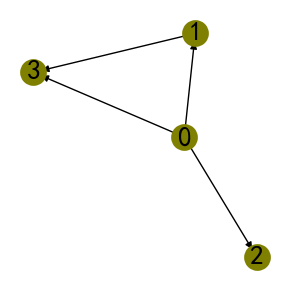

In [3]:
options = {
    'node_color': 'black',
    'node_size': 20,
    'width': 1,
}

G=dgl.to_networkx(g)
usda_nw.G_drawing(G)

In [4]:
g=g.int()
g.idtype

torch.int32

In [5]:
g.ndata['x'] = th.ones(g.num_nodes(), 3) 
g.edata['x'] = th.ones(g.num_edges(), dtype=th.int32)
g.ndata['y'] = th.randn(g.num_nodes(), 5)

In [6]:
g

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})

In [7]:
g.ndata['y']

tensor([[ 2.0133, -0.9014,  0.0645, -0.2768, -1.4673],
        [-0.0294, -0.3180,  0.5280, -0.8994, -0.0032],
        [-2.7992, -0.2146, -0.6175, -0.5193, -1.2342],
        [-0.6975, -0.0760, -0.6207,  0.6982,  0.8465]])

In [8]:
g.edata['x'][[0, 3]]

tensor([1, 1], dtype=torch.int32)

In [9]:
spmat = sp.rand(100, 100, density=0.05)
spmat.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
dgl.from_scipy(spmat) 

Graph(num_nodes=100, num_edges=500,
      ndata_schemes={}
      edata_schemes={})

In [11]:
import dgl
import torch as th
# 创建一个具有3种节点类型和3种边类型的异构图
graph_data = {
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
}
g = dgl.heterograph(graph_data)
print(g.ntypes,g.etypes,g.canonical_etypes)

['disease', 'drug', 'gene'] ['interacts', 'interacts', 'treats'] [('drug', 'interacts', 'drug'), ('drug', 'interacts', 'gene'), ('drug', 'treats', 'disease')]


In [12]:
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [13]:
g.num_nodes('drug')

3

In [14]:
print(g.nodes('drug'),g.nodes('gene'),g.nodes('disease'))

tensor([0, 1, 2]) tensor([0, 1, 2, 3]) tensor([0, 1, 2])


In [15]:
g.nodes['drug'].data['hv'] = th.ones(3, 1)

In [16]:
g.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [17]:
g.nodes['drug']

NodeSpace(data={'hv': tensor([[1.],
        [1.],
        [1.]])})

In [18]:
g.device

device(type='cpu')

In [19]:
g=g.to('cuda:0')
g.device

device(type='cuda', index=0)

nvidia-smi

In [26]:
g.ndata['hv']['drug'].device

device(type='cuda', index=0)

In [33]:
linear = nn.Parameter(torch.FloatTensor(size=(10, 5)))
linear

Parameter containing:
tensor([[1.5921e+03, 9.1785e-43, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       requires_grad=True)

In [34]:
linear.shape

torch.Size([10, 5])